In [46]:
import pandas as pd
import numpy as np
from faker import Faker
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# creating sample dataset using faker for fake names and data
fake = Faker()
np.random.seed(42)
data = {
    "customer_id": np.arange(1001, 1201),
    "customer_name": [fake.name() for _ in range(200)],
    "product_id": np.random.randint(1, 21, 200),
    "purchase_date": [fake.date_between(start_date='-1y', end_date='today') for _ in range(200)],
    "quantity": np.random.randint(1, 11, 200),
    "price_per_unit": np.round(np.random.uniform(10.0, 1000.0, 200), 2),
    "region": [random.choice(["North", "South", "East", "West"]) for _ in range(200)],
}

In [48]:
df = pd.DataFrame(data)

In [57]:
#convert DataFrame to csv file
df.to_csv("Cust_product.csv", index=False)
df.head()

,customer_id,customer_name,product_id,purchase_date,quantity,price_per_unit,region
0,1001,Blake Massey,7,2024-09-04,10,362.41,South
1,1002,Dr. Scott Fowler,20,2024-08-05,3,760.27,East
2,1003,Eric Perez,15,2024-06-03,3,24.25,West
3,1004,Craig Brown,11,2023-12-26,4,124.91,South
4,1005,Pamela Sexton,8,2024-04-17,7,55.54,East


In [58]:
#Checking Null
df.isnull().sum()

customer_id       0
customer_name     0
product_id        0
purchase_date     0
quantity          0
price_per_unit    0
region            0
dtype: int64

In [59]:
# Sales per region insight
sales_per_region = df.groupby('region')['quantity'].sum()
sales_per_region

region
East     289
North    233
South    236
West     315
Name: quantity, dtype: int32

In [60]:
# Top 5 customers by quantity
top_customers = df.groupby('customer_name')['quantity'].sum().sort_values(ascending=False).head(5)
top_customers

customer_name
Michelle Taylor    10
April Brown        10
Debra Griffith     10
Devin Frazier      10
Diana Walters      10
Name: quantity, dtype: int32

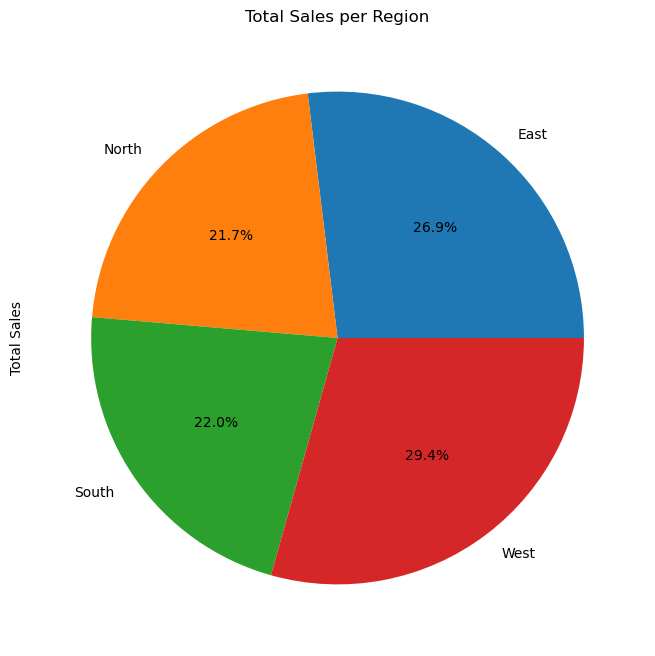

In [61]:
# creating pie chart
sales_per_region.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title("Total Sales per Region")
plt.ylabel("Total Sales")
plt.show()

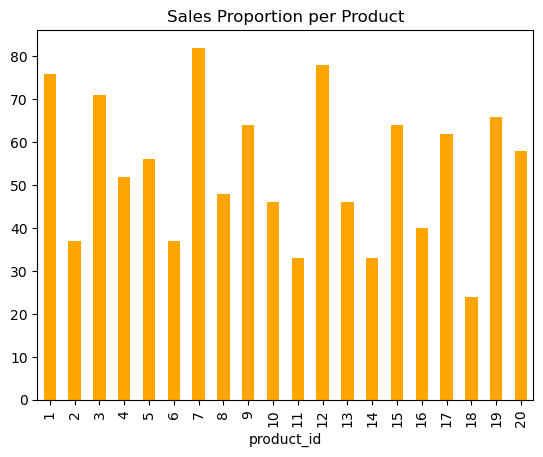

In [62]:
# creating Bar chart
sales_per_product = df.groupby('product_id')['quantity'].sum()
sales_per_product.plot(kind='bar', color='Orange')
plt.title("Sales Proportion per Product")
plt.show()

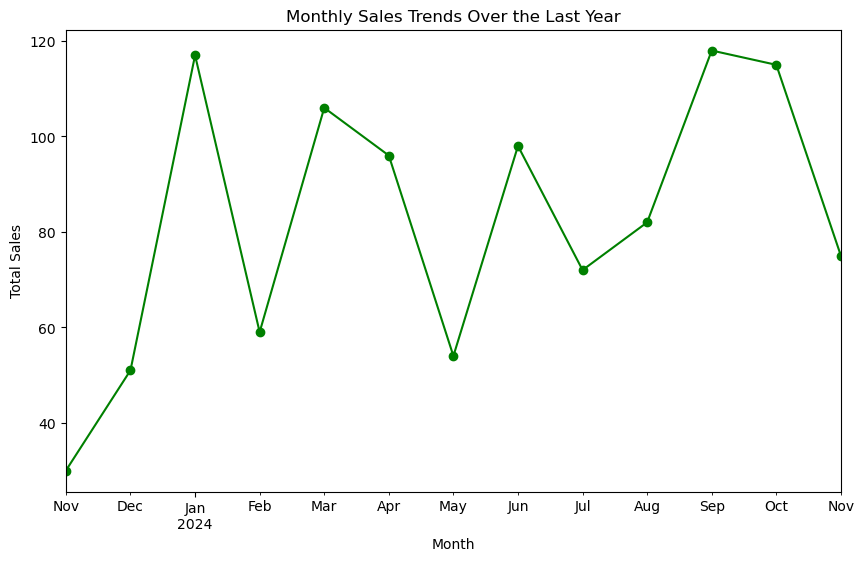

In [63]:
# Creating line chart
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trends Over the Last Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

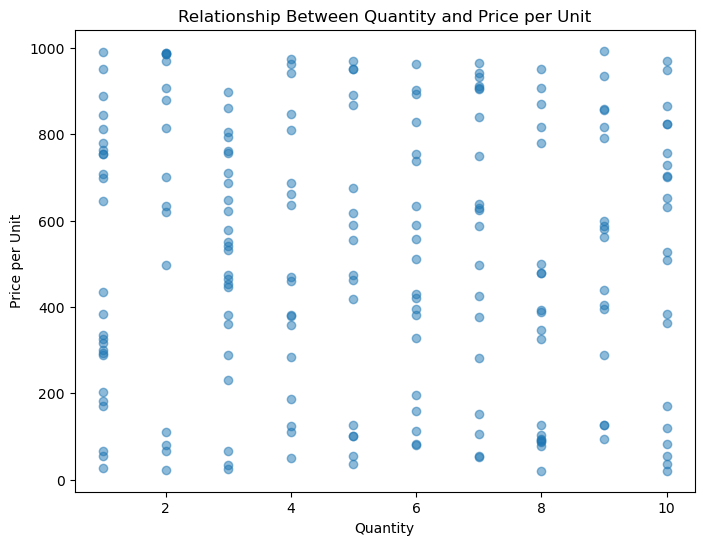

In [64]:
# creating scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['quantity'], df['price_per_unit'], alpha=0.5)
plt.title('Relationship Between Quantity and Price per Unit')
plt.xlabel('Quantity')
plt.ylabel('Price per Unit')
plt.show()